# Problem statement
1. Create  different group of customer on their buying pattern---Recency,Frequency and Monetary
2. Identify the business trend--days,Month,season,time(morning,afternoon,evening)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
original_data = pd.read_excel(r"C:\Users\Dell\Practice Dataset\Online_shopping.xlsx")

In [3]:
df = original_data.copy()
df.head()

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df["Country"].value_counts(normalize=True)

United Kingdom          0.914320
Germany                 0.017521
France                  0.015790
EIRE                    0.015124
Spain                   0.004674
Netherlands             0.004375
Belgium                 0.003818
Switzerland             0.003694
Portugal                0.002803
Australia               0.002323
Norway                  0.002004
Italy                   0.001482
Channel Islands         0.001399
Finland                 0.001283
Cyprus                  0.001148
Sweden                  0.000853
Unspecified             0.000823
Austria                 0.000740
Denmark                 0.000718
Japan                   0.000661
Poland                  0.000629
Israel                  0.000548
USA                     0.000537
Hong Kong               0.000531
Singapore               0.000423
Iceland                 0.000336
Canada                  0.000279
Greece                  0.000269
Malta                   0.000234
United Arab Emirates    0.000125
European C

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   lower        1816 non-null    object        
 3   Description  540455 non-null  object        
 4   Quantity     541909 non-null  int64         
 5   InvoiceDate  541909 non-null  datetime64[ns]
 6   UnitPrice    541909 non-null  float64       
 7   CustomerID   406829 non-null  float64       
 8   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 37.2+ MB


In [6]:
# Create  different group of customer on their buying pattern---Recency,Frequency and Monetary

In [7]:
df1=df.drop(["StockCode","lower","Description","Country"],axis=1)

In [8]:
df1.isnull().sum()

InvoiceNo           0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
dtype: int64

In [9]:
df1.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0
2,536365,8,2010-12-01 08:26:00,2.75,17850.0
3,536365,6,2010-12-01 08:26:00,3.39,17850.0
4,536365,6,2010-12-01 08:26:00,3.39,17850.0


In [10]:
# we can not retrieve the customer id or can not apply imputation approach

In [11]:
df1.dropna(axis=0,inplace=True)

In [12]:
df1.isnull().sum()

InvoiceNo      0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
dtype: int64

In [13]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,406829.0,12.061303,248.693370,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,406829.0,3.460471,69.315162,0.0,1.25,1.95,3.75,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.0,13953.00,15152.00,16791.00,18287.0


In [14]:
# the quantity is negative becouse of return item/defective item

In [15]:
df1[df1["UnitPrice"]==0]["UnitPrice"].count()

40

In [16]:
df1[df1["UnitPrice"]==0].head(10)

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
9302,537197,1,2010-12-05 14:02:00,0.0,12647.0
33576,539263,4,2010-12-16 14:36:00,0.0,16560.0
40089,539722,10,2010-12-21 13:45:00,0.0,14911.0
47068,540372,24,2011-01-06 16:41:00,0.0,13081.0
47070,540372,24,2011-01-06 16:41:00,0.0,13081.0
56674,541109,1,2011-01-13 15:10:00,0.0,15107.0
86789,543599,16,2011-02-10 13:08:00,0.0,17560.0
130188,547417,36,2011-03-23 10:25:00,0.0,13239.0
139453,548318,5,2011-03-30 12:45:00,0.0,13113.0
145208,548871,2,2011-04-04 14:42:00,0.0,14410.0


In [17]:
df1=df1[df1["Quantity"]>0]

In [18]:
df1.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [19]:
df1.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0
2,536365,8,2010-12-01 08:26:00,2.75,17850.0
3,536365,6,2010-12-01 08:26:00,3.39,17850.0
4,536365,6,2010-12-01 08:26:00,3.39,17850.0


In [20]:
df1["Total"]=df1["Quantity"]*df1["UnitPrice"]
df1.head(100)

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,15.30
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,22.00
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
...,...,...,...,...,...,...
95,536378,6,2010-12-01 09:37:00,2.55,14688.0,15.30
96,536378,120,2010-12-01 09:37:00,0.42,14688.0,50.40
97,536378,24,2010-12-01 09:37:00,0.55,14688.0,13.20
98,536378,24,2010-12-01 09:37:00,0.55,14688.0,13.20


In [21]:
#  now the drop the col Qty,Unitprice

In [22]:
df2=df1.drop(["Quantity","UnitPrice"],axis=1)
df2.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,15.30
1,536365,2010-12-01 08:26:00,17850.0,20.34
2,536365,2010-12-01 08:26:00,17850.0,22.00
3,536365,2010-12-01 08:26:00,17850.0,20.34
4,536365,2010-12-01 08:26:00,17850.0,20.34


In [23]:
# gropuby all unique invoive-- we are generating final invoice

In [24]:
df_final=df2.groupby(["InvoiceNo","InvoiceDate","CustomerID"]).agg({"Total":"sum"}).reset_index()

In [25]:
df_final.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85


In [26]:
# Recency
# Frequency
# Monetary

# Recency -- 
-Last date / recent date of purchase w.r.to custID
-Last Invoice Date(Dataset): Last purchase date of a particular cust.

In [27]:
# Calculate the last date of dataset

In [28]:
max(df_final["InvoiceDate"])

Timestamp('2011-12-09 12:50:00')

In [29]:
min(df_final["InvoiceDate"])

Timestamp('2010-12-01 08:26:00')

In [30]:
# Last date in the dataset Timestamp('2011-12-09 12:50:00')

In [31]:
# set the last date as benchmark by adding +1 day extra

In [32]:
import datetime as dt
latest_date=dt.datetime(2011,12,10)
latest_date

datetime.datetime(2011, 12, 10, 0, 0)

In [33]:
# to calclate the recency, frequency,monetary
# keep the reference as customer_id
# recency-latest_date- max. of cust invoice date
# frequency- counting of invoice no.
# Monetary - sum of total w.r.to cust id

In [34]:
RFM_score=df_final.groupby("CustomerID").agg({"InvoiceDate":lambda x:(latest_date-x.max()).days,
                                             "InvoiceNo":lambda x:x.count(),
                                             "Total":lambda x:x.sum()}).reset_index()

In [35]:
RFM_score.head()

,CustomerID,InvoiceDate,InvoiceNo,Total
0,12346.0,325,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40


In [36]:
# Rename the column
RFM_score=RFM_score.rename(columns={"InvoiceDate":"Recency","InvoiceNo":"Frequency","Total":"Monetary"})

In [37]:
RFM_score.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40


# Calculate the marks on the basis of R F M
- Pandas DataFrame has rank() method- return rank of every respective index

In [39]:
RFM=RFM_score.copy()

In [40]:
RFM["R_rank"]=RFM["Recency"].rank(ascending=False)
RFM["R_rank"]

0        162.5
1       4156.5
2       1646.0
3       3209.5
4        227.5
         ...  
4334     355.0
4335     860.0
4336    3839.5
4337    4064.5
4338    2357.0
Name: R_rank, Length: 4339, dtype: float64

In [41]:
# Frequency rank

In [42]:
RFM["F_rank"]=RFM["Frequency"].rank(ascending=True)
RFM["F_rank"]

0        746.5
1       3709.5
2       3028.0
3        746.5
4        746.5
         ...  
4334     746.5
4335     746.5
4336    1910.5
4337    4182.5
4338    2581.5
Name: F_rank, Length: 4339, dtype: float64

In [43]:
RFM["M_rank"]=RFM["Monetary"].rank(ascending=True)
RFM["M_rank"]

0       4330.0
1       4004.0
2       3334.0
3       3306.0
4       1230.0
         ...  
4334     564.0
4335     105.0
4336     547.0
4337    3489.0
4338    3357.0
Name: M_rank, Length: 4339, dtype: float64

In [44]:
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R_rank,F_rank,M_rank
0,12346.0,325,1,77183.60,162.5,746.5,4330.0
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0
4,12350.0,310,1,334.40,227.5,746.5,1230.0


In [ ]:
# percsentile mark

In [ ]:
# Recency

In [45]:
RFM1 = RFM.copy()

In [46]:
RFM1.head()

,CustomerID,Recency,Frequency,Monetary,R_rank,F_rank,M_rank
0,12346.0,325,1,77183.60,162.5,746.5,4330.0
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0
4,12350.0,310,1,334.40,227.5,746.5,1230.0


In [47]:
RFM1["R_final"]=(RFM1["R_rank"]/RFM1["R_rank"].max())*100
RFM1["R_final"]

0        3.759833
1       96.170754
2       38.084220
3       74.259602
4        5.263767
          ...    
4334     8.213790
4335    19.898195
4336    88.836187
4337    94.042110
4338    54.534938
Name: R_final, Length: 4339, dtype: float64

In [48]:
# Frequency

In [49]:
RFM1["F_final"]=(RFM1["F_rank"]/RFM1["F_rank"].max())*100
RFM1["F_final"]

0       17.204425
1       85.492049
2       69.785665
3       17.204425
4       17.204425
          ...    
4334    17.204425
4335    17.204425
4336    44.030883
4337    96.393178
4338    59.495275
Name: F_final, Length: 4339, dtype: float64

In [50]:
# Monetary

In [51]:
RFM1["M_final"]=(RFM1["M_rank"]/RFM1["M_rank"].max())*100
RFM1["M_final"]

0       99.792579
1       92.279327
2       76.837981
3       76.192671
4       28.347546
          ...    
4334    12.998387
4335     2.419912
4336    12.606591
4337    80.410233
4338    77.368057
Name: M_final, Length: 4339, dtype: float64

In [52]:
RFM1.head()

,CustomerID,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,R_final,F_final,M_final
0,12346.0,325,1,77183.60,162.5,746.5,4330.0,3.759833,17.204425,99.792579
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0,96.170754,85.492049,92.279327
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0,38.084220,69.785665,76.837981
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0,74.259602,17.204425,76.192671
4,12350.0,310,1,334.40,227.5,746.5,1230.0,5.263767,17.204425,28.347546


In [53]:
# final sum of the marks
# depend on our business pattern, we can give required weightage R, F, M

In [54]:
RFM1["RFM_SUM"]=0.20*RFM1["R_final"]+0.30*RFM1["F_final"]+0.60*RFM1["M_final"]

In [55]:
RFM1=RFM1.round(2)
RFM1.head()

,CustomerID,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,R_final,F_final,M_final,RFM_SUM
0,12346.0,325,1,77183.60,162.5,746.5,4330.0,3.76,17.20,99.79,65.79
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0,96.17,85.49,92.28,100.25
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0,38.08,69.79,76.84,74.66
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0,74.26,17.20,76.19,65.73
4,12350.0,310,1,334.40,227.5,746.5,1230.0,5.26,17.20,28.35,23.22


In [56]:
# sefmentation of customer in 4 groups------silver,gold,diamond,platinum

In [57]:
Loyality_label=["silver","Gold","Diamond","Platinum"]

In [58]:
quant100=RFM1["RFM_SUM"].quantile(q=[0.25,0.50,0.75])

In [59]:
quant100

0.25    30.295
0.50    53.720
0.75    78.945
Name: RFM_SUM, dtype: float64

In [60]:
quant200=RFM1["RFM_SUM"].quantile(q=[0.20,0.60,0.80])
quant200

0.2    26.326
0.6    63.926
0.8    83.924
Name: RFM_SUM, dtype: float64

In [61]:
# lets see

In [62]:
import seaborn as sns

<Axes: ylabel='Proportion'>

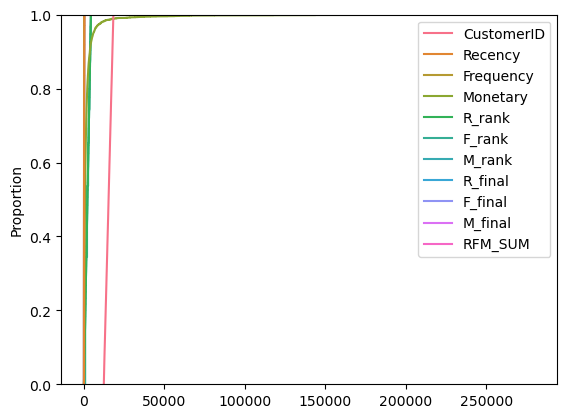

In [63]:
sns.ecdfplot(data=RFM1)

<Axes: ylabel='Density'>

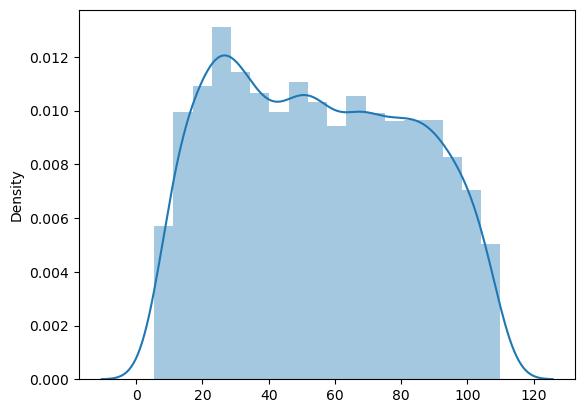

In [64]:
sns.distplot(x=RFM1["RFM_SUM"])

In [65]:
min(RFM1["RFM_SUM"])

5.39

In [66]:
max(RFM1["RFM_SUM"])

109.92

In [67]:
# Lets assign the loyality label as per required percentile

In [68]:
def loyality(x):
    if x<=25:
        return "silver"
    elif x<=55:
        return "Gold"
    elif x<=76:
        return "Diamond"
    else:
        return "Platinum"

In [69]:
# Lets use this function

In [70]:
RFM1["Loyality"]=RFM1["RFM_SUM"].apply(loyality)

In [71]:
RFM1.head(20)

,CustomerID,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,R_final,F_final,M_final,RFM_SUM,Loyality
0,12346.0,325,1,77183.60,162.5,746.5,4330.0,3.76,17.20,99.79,65.79,Diamond
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0,96.17,85.49,92.28,100.25,Platinum
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0,38.08,69.79,76.84,74.66,Diamond
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0,74.26,17.20,76.19,65.73,Diamond
4,12350.0,310,1,334.40,227.5,746.5,1230.0,5.26,17.20,28.35,23.22,silver
5,12352.0,36,8,2506.04,2502.5,3828.0,3638.0,57.90,88.22,83.84,88.35,Platinum
6,12353.0,204,1,89.00,725.5,746.5,117.0,16.79,17.20,2.70,10.14,silver
7,12354.0,232,1,1079.40,602.5,746.5,2780.0,13.94,17.20,64.07,46.39,Gold
8,12355.0,214,1,459.40,672.5,746.5,1660.0,15.56,17.20,38.26,31.23,Gold
9,12356.0,22,3,2811.43,3037.5,2581.5,3739.0,70.28,59.50,86.17,83.61,Platinum


In [72]:
RFM1["Loyality"].value_counts()

Gold        1433
Platinum    1208
Diamond      903
silver       795
Name: Loyality, dtype: int64

In [73]:
RFM1["Loyality"].value_counts(normalize=True)

Gold        0.330260
Platinum    0.278405
Diamond     0.208112
silver      0.183222
Name: Loyality, dtype: float64

In [74]:
# Lets do the clustering with help of algorithm--

In [75]:
Newdata=RFM1["RFM_SUM"]

In [76]:
Newdata.head()

0     65.79
1    100.25
2     74.66
3     65.73
4     23.22
Name: RFM_SUM, dtype: float64

In [77]:
Newdata=pd.DataFrame(Newdata)

In [78]:
from sklearn.cluster import KMeans

In [79]:
kmeans1=KMeans(max_iter=100,random_state=100,n_clusters=4)
y_means=kmeans1.fit_predict(Newdata)
y_means

array([3, 1, 3, ..., 2, 1, 3])

In [80]:
RFM1["Cluster"]=kmeans1.labels_
RFM1.head(20)

,CustomerID,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,R_final,F_final,M_final,RFM_SUM,Loyality,Cluster
0,12346.0,325,1,77183.60,162.5,746.5,4330.0,3.76,17.20,99.79,65.79,Diamond,3
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0,96.17,85.49,92.28,100.25,Platinum,1
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0,38.08,69.79,76.84,74.66,Diamond,3
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0,74.26,17.20,76.19,65.73,Diamond,3
4,12350.0,310,1,334.40,227.5,746.5,1230.0,5.26,17.20,28.35,23.22,silver,0
5,12352.0,36,8,2506.04,2502.5,3828.0,3638.0,57.90,88.22,83.84,88.35,Platinum,1
6,12353.0,204,1,89.00,725.5,746.5,117.0,16.79,17.20,2.70,10.14,silver,0
7,12354.0,232,1,1079.40,602.5,746.5,2780.0,13.94,17.20,64.07,46.39,Gold,2
8,12355.0,214,1,459.40,672.5,746.5,1660.0,15.56,17.20,38.26,31.23,Gold,0
9,12356.0,22,3,2811.43,3037.5,2581.5,3739.0,70.28,59.50,86.17,83.61,Platinum,1


In [81]:
RFM1["Cluster"].value_counts()

0    1225
2    1114
3    1049
1     951
Name: Cluster, dtype: int64

In [82]:
RFM1["Loyality"].value_counts()

Gold        1433
Platinum    1208
Diamond      903
silver       795
Name: Loyality, dtype: int64

In [83]:
# Lets see the visulization of bets cluster as per sum of suare error

Text(0, 0.5, 'SSE')

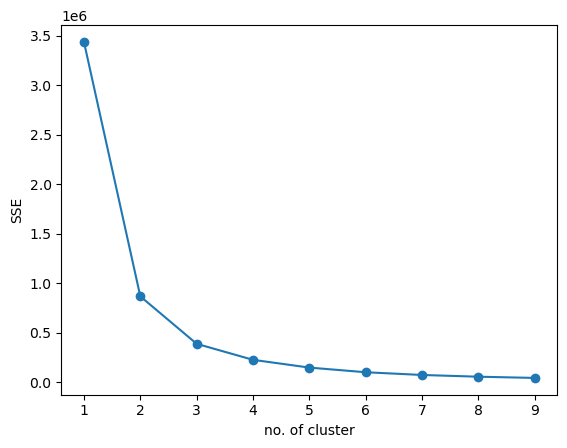

In [84]:
SSE=[]
for i in range(1,10):
    kmeans1=KMeans(max_iter=100,random_state=100,n_clusters=i)
    kmeans1.fit_predict(Newdata)
    SSE.append(kmeans1.inertia_)
    
plt.plot(range(1,10),SSE,marker="o")
plt.xlabel("no. of cluster")
plt.ylabel("SSE")

In [85]:
# Evaluation of clustering

In [86]:
from sklearn.metrics import silhouette_score

In [87]:
labels=kmeans1.labels_
silhouette_score(Newdata,labels)

0.5395777922322624

In [88]:
# Goal2: Identify the business trend--days,Month,season,time(morning,afternoon,evening)

In [89]:
df_final.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85


In [90]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18566 entries, 0 to 18565
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    18566 non-null  int64         
 1   InvoiceDate  18566 non-null  datetime64[ns]
 2   CustomerID   18566 non-null  float64       
 3   Total        18566 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 580.3 KB


In [91]:
df_final1=df_final.copy()

In [92]:
df_final1.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85


In [93]:
# Extraction of day,month,time,year,date......from datetime data type....InvoiceDate

In [94]:
import datetime as dt

In [95]:
df_final1["Day"]=df_final1["InvoiceDate"].dt.day_name()
df_final1.head(10)

,InvoiceNo,InvoiceDate,CustomerID,Total,Day
0,536365,2010-12-01 08:26:00,17850.0,139.12,Wednesday
1,536366,2010-12-01 08:28:00,17850.0,22.20,Wednesday
2,536367,2010-12-01 08:34:00,13047.0,278.73,Wednesday
3,536368,2010-12-01 08:34:00,13047.0,70.05,Wednesday
4,536369,2010-12-01 08:35:00,13047.0,17.85,Wednesday
5,536370,2010-12-01 08:45:00,12583.0,855.86,Wednesday
6,536371,2010-12-01 09:00:00,13748.0,204.00,Wednesday
7,536372,2010-12-01 09:01:00,17850.0,22.20,Wednesday
8,536373,2010-12-01 09:02:00,17850.0,259.86,Wednesday
9,536374,2010-12-01 09:09:00,15100.0,350.40,Wednesday


In [96]:
df_final1["Day"].value_counts()

Thursday     4038
Wednesday    3462
Tuesday      3189
Monday       2865
Friday       2835
Sunday       2177
Name: Day, dtype: int64

In [97]:
# Month extraction

In [98]:
df_final1["Month"]=df_final1["InvoiceDate"].dt.month
df_final1.head(10)

,InvoiceNo,InvoiceDate,CustomerID,Total,Day,Month
0,536365,2010-12-01 08:26:00,17850.0,139.12,Wednesday,12
1,536366,2010-12-01 08:28:00,17850.0,22.20,Wednesday,12
2,536367,2010-12-01 08:34:00,13047.0,278.73,Wednesday,12
3,536368,2010-12-01 08:34:00,13047.0,70.05,Wednesday,12
4,536369,2010-12-01 08:35:00,13047.0,17.85,Wednesday,12
5,536370,2010-12-01 08:45:00,12583.0,855.86,Wednesday,12
6,536371,2010-12-01 09:00:00,13748.0,204.00,Wednesday,12
7,536372,2010-12-01 09:01:00,17850.0,22.20,Wednesday,12
8,536373,2010-12-01 09:02:00,17850.0,259.86,Wednesday,12
9,536374,2010-12-01 09:09:00,15100.0,350.40,Wednesday,12


In [99]:
df_final1["Hour"]=df_final1["InvoiceDate"].dt.hour
df_final1.head()

,InvoiceNo,InvoiceDate,CustomerID,Total,Day,Month,Hour
0,536365,2010-12-01 08:26:00,17850.0,139.12,Wednesday,12,8
1,536366,2010-12-01 08:28:00,17850.0,22.20,Wednesday,12,8
2,536367,2010-12-01 08:34:00,13047.0,278.73,Wednesday,12,8
3,536368,2010-12-01 08:34:00,13047.0,70.05,Wednesday,12,8
4,536369,2010-12-01 08:35:00,13047.0,17.85,Wednesday,12,8


In [100]:
# Create season on the basis of maths

In [101]:
def cal_season(x):
    if x in [10,11,12,1]:
        return "Winter"
    elif x in [2,3]:
        return "Spring"
    elif x in [4,5,6]:
        return "Summer"
    else:
        return "Monsoon"

In [102]:
# timing

In [103]:
def cal_timing(x):
    if x in range(1,4):
        return "Late Night"
    
    elif x in range(4,12):
        return "Morning"
    elif x in range(12,16):
        return "Afternoon"
    else:
        return "Evening"

In [104]:
df_final1["Season"]=df_final1["Month"].apply(cal_season)

In [105]:
df_final1["Timing"]=df_final1["Hour"].apply(cal_timing)

In [106]:
df_final1.head()

,InvoiceNo,InvoiceDate,CustomerID,Total,Day,Month,Hour,Season,Timing
0,536365,2010-12-01 08:26:00,17850.0,139.12,Wednesday,12,8,Winter,Morning
1,536366,2010-12-01 08:28:00,17850.0,22.20,Wednesday,12,8,Winter,Morning
2,536367,2010-12-01 08:34:00,13047.0,278.73,Wednesday,12,8,Winter,Morning
3,536368,2010-12-01 08:34:00,13047.0,70.05,Wednesday,12,8,Winter,Morning
4,536369,2010-12-01 08:35:00,13047.0,17.85,Wednesday,12,8,Winter,Morning


In [107]:
df_final1["Timing"].value_counts()

Afternoon    10095
Morning       6489
Evening       1982
Name: Timing, dtype: int64

In [108]:
df_final1["Season"].value_counts()

Winter     7762
Monsoon    4371
Summer     4106
Spring     2327
Name: Season, dtype: int64

In [109]:
df_final1["Weekend"]=np.where((df_final1.Day=="Saturday")|(df_final1.Day=="Sunday"),"Weekend","Weekday")

In [110]:
df_final1.head()

,InvoiceNo,InvoiceDate,CustomerID,Total,Day,Month,Hour,Season,Timing,Weekend
0,536365,2010-12-01 08:26:00,17850.0,139.12,Wednesday,12,8,Winter,Morning,Weekday
1,536366,2010-12-01 08:28:00,17850.0,22.20,Wednesday,12,8,Winter,Morning,Weekday
2,536367,2010-12-01 08:34:00,13047.0,278.73,Wednesday,12,8,Winter,Morning,Weekday
3,536368,2010-12-01 08:34:00,13047.0,70.05,Wednesday,12,8,Winter,Morning,Weekday
4,536369,2010-12-01 08:35:00,13047.0,17.85,Wednesday,12,8,Winter,Morning,Weekday


In [111]:
# analysis of no. of invoice has been genrated

In [112]:
day_invoice_count=df_final1.groupby('Day')['InvoiceNo'].count()

In [113]:
day_invoice_count

Day
Friday       2835
Monday       2865
Sunday       2177
Thursday     4038
Tuesday      3189
Wednesday    3462
Name: InvoiceNo, dtype: int64

In [114]:
df_final1["Day"].value_counts()

Thursday     4038
Wednesday    3462
Tuesday      3189
Monday       2865
Friday       2835
Sunday       2177
Name: Day, dtype: int64

In [115]:
# Do the pie plot , count plot for all the columns ()

In [116]:
# Season
season_count=df_final1.groupby('Season')['InvoiceNo'].count().to_frame('Invoice_count')

In [117]:
season_count

,Invoice_count
Season,
Monsoon,4371
Spring,2327
Summer,4106
Winter,7762


plt.pie(season_count.Invoice_count,labels=season_count['Season'],autopct="%.1f%%")

# Recomendation Engine----Data filteration approach
- use in product recommendation, service, movie, youtube, filipkart

In [ ]:
# Different Techniques are involved in Recomendation engine
-(1)Collaborative filtering--

In [119]:
df100=original_data.copy()

In [120]:
df100.head()

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [121]:
df100.isnull().sum()

InvoiceNo           0
StockCode           0
lower          540093
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [122]:
df100=df.drop(['lower'],axis=1)

In [123]:
df100=df100.dropna(axis=0)

In [124]:
df100.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [125]:
df100.shape

(406829, 8)

In [126]:
custID_matrix=df100.pivot_table(index='CustomerID',columns='StockCode',values='Quantity',aggfunc='sum')

In [127]:
custID_matrix.head()

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12347.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12348.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
12349.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
12350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [128]:
# apply the mapping function to change nan as 0

In [129]:
custID_matrix=custID_matrix.applymap(lambda x:1 if x>0 else 0)

In [130]:
custID_matrix

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12349.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12350.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18281.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18282.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# find the degree of similarity or filteration of item based on similar pattern

In [131]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
similarity=cosine_similarity(custID_matrix)

In [133]:
similarity.shape

(4372, 4372)

In [134]:
similarity[90]

array([0.        , 0.08549917, 0.09249946, ..., 0.        , 0.16720631,
       0.        ])

In [135]:
sorted(similarity[70],reverse=True)

[1.0,
 0.23680111138915755,
 0.21399624418051005,
 0.20440449716357192,
 0.2018029239751828,
 0.19840120549324974,
 0.18959262392869294,
 0.1875080380682951,
 0.18532618377477952,
 0.18465111993730904,
 0.18342535215472291,
 0.17953677653705177,
 0.17926632646950125,
 0.17760083354186815,
 0.17307359477056478,
 0.16984363818536338,
 0.16953982233799922,
 0.16828722193991033,
 0.1682872219399103,
 0.16761815710715988,
 0.16744367165578428,
 0.1650203358594938,
 0.16430909967247118,
 0.16412762703128403,
 0.16408774666937076,
 0.16398214824717156,
 0.16126279404876018,
 0.16046685200345995,
 0.15716774064989722,
 0.15502271679864055,
 0.15432956750538915,
 0.15306661076556338,
 0.15285446012893575,
 0.15237901742158796,
 0.1504659622500766,
 0.1481293349681228,
 0.14785637406257413,
 0.14767143793758666,
 0.14767143793758666,
 0.14757847510940109,
 0.14725448245709033,
 0.14706746224528508,
 0.14615681904837388,
 0.14501047335684952,
 0.14501047335684952,
 0.14431314135883225,
 0.1442762

In [136]:
final=pd.DataFrame(similarity)

In [137]:
final

,0,1,2,3,4,5,6,7,8,9,...,4362,4363,4364,4365,4366,4367,4368,4369,4370,4371
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,1.000000,0.063022,0.046130,0.047795,0.038814,0.0,0.025876,0.136641,0.094742,...,0.0,0.0,0.054656,0.000000,0.032844,0.062318,0.000000,0.113776,0.109364,0.012828
2,0.0,0.063022,1.000000,0.024953,0.051709,0.027995,0.0,0.027995,0.118262,0.146427,...,0.0,0.0,0.118262,0.000000,0.000000,0.000000,0.000000,0.000000,0.170905,0.083269
3,0.0,0.046130,0.024953,1.000000,0.056773,0.138314,0.0,0.030737,0.032461,0.144692,...,0.0,0.0,0.000000,0.000000,0.039014,0.000000,0.000000,0.067574,0.137124,0.030475
4,0.0,0.047795,0.051709,0.056773,1.000000,0.031846,0.0,0.000000,0.000000,0.033315,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044866,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,0.0,0.062318,0.000000,0.000000,0.000000,0.000000,0.0,0.041523,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.105409,1.000000,0.119523,0.000000,0.000000,0.000000
4368,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.049629,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.119523,1.000000,0.000000,0.046613,0.000000
4369,0.0,0.113776,0.000000,0.067574,0.000000,0.037905,0.0,0.000000,0.160128,0.079305,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.017800,0.000000
4370,0.0,0.109364,0.170905,0.137124,0.044866,0.072870,0.0,0.113354,0.034204,0.093170,...,0.0,0.0,0.017102,0.043602,0.000000,0.000000,0.046613,0.017800,1.000000,0.096334


In [147]:
final.columns=custID_matrix.index

In [148]:
final.head()

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,0.0,1.000000,0.063022,0.046130,0.047795,0.038814,0.0,0.025876,0.136641,0.094742,...,0.0,0.0,0.054656,0.0,0.032844,0.062318,0.0,0.113776,0.109364,0.012828
2,0.0,0.063022,1.000000,0.024953,0.051709,0.027995,0.0,0.027995,0.118262,0.146427,...,0.0,0.0,0.118262,0.0,0.000000,0.000000,0.0,0.000000,0.170905,0.083269
3,0.0,0.046130,0.024953,1.000000,0.056773,0.138314,0.0,0.030737,0.032461,0.144692,...,0.0,0.0,0.000000,0.0,0.039014,0.000000,0.0,0.067574,0.137124,0.030475
4,0.0,0.047795,0.051709,0.056773,1.000000,0.031846,0.0,0.000000,0.000000,0.033315,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.044866,0.000000


In [149]:
final["CustomerID"]=custID_matrix.index

In [150]:
final.head()

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0,CustomerID
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,12346.0
1,0.0,1.000000,0.063022,0.046130,0.047795,0.038814,0.0,0.025876,0.136641,0.094742,...,0.0,0.054656,0.0,0.032844,0.062318,0.0,0.113776,0.109364,0.012828,12347.0
2,0.0,0.063022,1.000000,0.024953,0.051709,0.027995,0.0,0.027995,0.118262,0.146427,...,0.0,0.118262,0.0,0.000000,0.000000,0.0,0.000000,0.170905,0.083269,12348.0
3,0.0,0.046130,0.024953,1.000000,0.056773,0.138314,0.0,0.030737,0.032461,0.144692,...,0.0,0.000000,0.0,0.039014,0.000000,0.0,0.067574,0.137124,0.030475,12349.0
4,0.0,0.047795,0.051709,0.056773,1.000000,0.031846,0.0,0.000000,0.000000,0.033315,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.044866,0.000000,12350.0


In [151]:
final=final.set_index("CustomerID")

In [152]:
final

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12347.0,0.0,1.000000,0.063022,0.046130,0.047795,0.038814,0.0,0.025876,0.136641,0.094742,...,0.0,0.0,0.054656,0.000000,0.032844,0.062318,0.000000,0.113776,0.109364,0.012828
12348.0,0.0,0.063022,1.000000,0.024953,0.051709,0.027995,0.0,0.027995,0.118262,0.146427,...,0.0,0.0,0.118262,0.000000,0.000000,0.000000,0.000000,0.000000,0.170905,0.083269
12349.0,0.0,0.046130,0.024953,1.000000,0.056773,0.138314,0.0,0.030737,0.032461,0.144692,...,0.0,0.0,0.000000,0.000000,0.039014,0.000000,0.000000,0.067574,0.137124,0.030475
12350.0,0.0,0.047795,0.051709,0.056773,1.000000,0.031846,0.0,0.000000,0.000000,0.033315,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044866,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0.0,0.062318,0.000000,0.000000,0.000000,0.000000,0.0,0.041523,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.105409,1.000000,0.119523,0.000000,0.000000,0.000000
18281.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.049629,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.119523,1.000000,0.000000,0.046613,0.000000
18282.0,0.0,0.113776,0.000000,0.067574,0.000000,0.037905,0.0,0.000000,0.160128,0.079305,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.017800,0.000000


In [153]:
final.loc[12436.0].sort_values(ascending=False)

CustomerID
12436.0    1.000000
17079.0    0.353553
15199.0    0.335410
16163.0    0.335410
13058.0    0.335410
             ...   
15096.0    0.000000
15097.0    0.000000
15098.0    0.000000
15099.0    0.000000
18287.0    0.000000
Name: 12436.0, Length: 4372, dtype: float64

In [158]:
items_cust_A=set(custID_matrix.loc[12350].iloc[custID_matrix.loc[12350].to_numpy().nonzero()].index)

In [159]:
items_cust_A

{20615,
 20652,
 21171,
 21832,
 21864,
 21866,
 21908,
 21915,
 22348,
 22412,
 22551,
 22557,
 22620,
 '79066K',
 '79191C',
 '84086C',
 'POST'}

In [160]:
items_cust_B=set(custID_matrix.loc[17935].iloc[custID_matrix.loc[17935].to_numpy().nonzero()].index)

In [161]:
items_cust_B

{20657,
 20659,
 20828,
 20856,
 21051,
 21866,
 21867,
 22208,
 22209,
 22210,
 22211,
 22449,
 22450,
 22551,
 22553,
 22557,
 22640,
 22659,
 22749,
 22752,
 22753,
 22754,
 22755,
 23290,
 23292,
 23309,
 '85099B',
 'POST'}

In [162]:
Recommended_item_cust_A=items_cust_B-items_cust_A

In [163]:
Recommended_item_cust_A

{20657,
 20659,
 20828,
 20856,
 21051,
 21867,
 22208,
 22209,
 22210,
 22211,
 22449,
 22450,
 22553,
 22640,
 22659,
 22749,
 22752,
 22753,
 22754,
 22755,
 23290,
 23292,
 23309,
 '85099B'}

In [164]:
df100.loc[df100["StockCode"].isin(items_cust_B),["StockCode","Description"]].drop_duplicates().set_index("StockCode")

,Description
StockCode,
22752,SET 7 BABUSHKA NESTING BOXES
22749,FELTCRAFT PRINCESS CHARLOTTE DOLL
22659,LUNCH BOX I LOVE LONDON
POST,POSTAGE
85099B,JUMBO BAG RED RETROSPOT
22557,PLASTERS IN TIN VINTAGE PAISLEY
22553,PLASTERS IN TIN SKULLS
22449,SILK PURSE BABUSHKA PINK
21866,UNION JACK FLAG LUGGAGE TAG


In [165]:
df100.loc[df100["StockCode"].isin(Recommended_item_cust_A),["StockCode","Description"]].drop_duplicates().set_index("StockCode")

,Description
StockCode,
22752,SET 7 BABUSHKA NESTING BOXES
22749,FELTCRAFT PRINCESS CHARLOTTE DOLL
22659,LUNCH BOX I LOVE LONDON
85099B,JUMBO BAG RED RETROSPOT
22553,PLASTERS IN TIN SKULLS
22449,SILK PURSE BABUSHKA PINK
21867,PINK UNION JACK LUGGAGE TAG
22754,SMALL RED BABUSHKA NOTEBOOK
22755,SMALL PURPLE BABUSHKA NOTEBOOK
